In [1]:
import pandas as pd
import numpy as np

train_data = pd.read_csv("final_train.csv")

In [2]:
train_data.head()

,Unnamed: 0,Activity,"angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyAccMean,gravity)","angle(tBodyGyroJerkMean,gravityMean)","angle(tBodyGyroMean,gravityMean)",energy-mean(),...,tGravityAccMag-energy(),tGravityAccMag-entropy(),tGravityAccMag-iqr(),tGravityAccMag-mad(),tGravityAccMag-max(),tGravityAccMag-mean(),tGravityAccMag-min(),tGravityAccMag-sma(),tGravityAccMag-std(),void()
0,0,STANDING,-1.574191,-0.805700,-2.453831,-1.861714,0.115517,-2.023369,3.125860,-9.474436,...,5.049130,3.272281,5.103018,-0.823302,3.063681,-0.928676,-1.007695,3.094236,1.669987,1.0
1,1,WALKING_UPSTAIRS,-1.568669,-0.612620,-2.488338,-1.751117,0.218134,0.280294,7.953403,-0.679894,...,4.565443,4.440779,3.288399,-2.689605,1.705341,-0.822617,-0.572410,-2.187890,-0.544652,2.0
2,2,LAYING,-1.548333,-0.139628,-2.380889,-1.915239,0.067613,-0.887342,6.007361,-11.906904,...,5.059609,2.296603,5.344174,-0.549843,3.272225,-0.940610,-1.031522,-2.071755,2.024442,3.0
3,3,WALKING,-1.574094,-0.793443,-2.449959,-1.842741,-0.195625,-0.950671,2.104353,-11.906121,...,4.860758,4.177535,3.950012,-0.322642,2.366287,-0.866937,-0.696431,1.863375,0.550414,2.0
4,4,LAYING,-1.548333,-0.139628,-2.380889,NaN,0.067613,-0.887342,6.007361,-11.970485,...,5.059609,2.296603,5.344174,-0.549843,3.272225,-0.940610,-1.031522,-2.102513,2.024442,3.0


In [3]:
train_data.drop(train_data[train_data['angle(X,gravityMean)'] > -1.554], axis=1)

""
0
1
2
3
4
...
11081
11082
11083
11084


In [4]:
cols = ['Unnamed: 0',
 'Activity',
 'angle(tBodyGyroJerkMean,gravityMean)',
 'angle(tBodyGyroMean,gravityMean)',
 'energy-mean()',
 'fBodyAcc-bandsEnergy()-1,16',
 'fBodyAcc-bandsEnergy()-1,24.1',
 'fBodyAcc-bandsEnergy()-25,48',
 'fBodyAcc-bandsEnergy()-33,48',
 'fBodyAcc-bandsEnergy()-41,48',
 'fBodyAcc-bandsEnergy()-49,64.1',
 'fBodyAcc-bandsEnergy()-9,16',
 'fBodyAcc-bandsEnergy()-9,16.1',
 'fBodyAcc-energy()-X',
 'fBodyAcc-entropy()-X',
 'fBodyAcc-entropy()-Y',
 'fBodyAcc-entropy()-Z',
 'fBodyAcc-iqr()-Y',
 'fBodyAcc-kurtosis()-X',
 'fBodyAcc-kurtosis()-Y',
 'fBodyAcc-mad()-Z',
 'fBodyAcc-main()-Y',
 'fBodyAcc-main()-Z',
 'fBodyAcc-max()-Y',
 'fBodyAcc-meanFreq()-X',
 'fBodyAcc-meanFreq()-Y',
 'fBodyAcc-skewness()-X',
 'fBodyAcc-skewness()-Y',
 'fBodyAcc-sma()',
 'fBodyAcc-std()-X',
 'fBodyAcc-std()-Y',
 'fBodyAccJerk-bandsEnergy()-1,16.1',
 'fBodyAccJerk-bandsEnergy()-1,24.2',
 'fBodyAccJerk-bandsEnergy()-1,8',
 'fBodyAccJerk-bandsEnergy()-17,24',
 'fBodyAccJerk-bandsEnergy()-25,32',
 'fBodyAccJerk-bandsEnergy()-25,32.1',
 'fBodyAccJerk-bandsEnergy()-25,48',
 'fBodyAccJerk-bandsEnergy()-41,48',
 'fBodyAccJerk-bandsEnergy()-41,48.1',
 'fBodyAccJerk-entropy()-X',
 'fBodyAccJerk-entropy()-Y',
 'fBodyAccJerk-entropy()-Z',
 'fBodyAccJerk-kurtosis()-Z',
 'fBodyAccJerk-mad()-X',
 'fBodyAccJerk-mad()-Z',
 'fBodyAccJerk-maxInds-Y',
 'fBodyAccJerk-mean()-X',
 'fBodyAccJerk-mean()-Y',
 'fBodyAccJerk-mean()-Z',
 'fBodyAccJerk-meanFreq()-X',
 'fBodyAccJerk-meanFreq()-Z',
 'fBodyAccJerk-min()-Z',
 'fBodyAccJerk-skewness()-X',
 'fBodyAccJerk-skewness()-Z',
 'fBodyAccJerk-sma()',
 'fBodyAccJerk-std()-X',
 'fBodyAccJerk-std()-Y',
 'fBodyAccJerk-std()-Z',
 'fBodyAccMag-energy()',
 'fBodyAccMag-entropy()',
 'fBodyAccMag-iqr()',
 'fBodyAccMag-mad()',
 'fBodyAccMag-mean()',
 'fBodyAccMag-meanFreq()',
 'fBodyAccMag-skewness()',
 'fBodyAccMag-sma()',
 'fBodyAccMag-std()',
 'fBodyBodyAccJerkMag-entropy()',
 'fBodyBodyAccJerkMag-iqr()',
 'fBodyBodyAccJerkMag-kurtosis()',
 'fBodyBodyAccJerkMag-mad()',
 'fBodyBodyAccJerkMag-max()',
 'fBodyBodyAccJerkMag-meanFreq()',
 'fBodyBodyAccJerkMag-skewness()',
 'fBodyBodyGyroJerkMag-entropy()',
 'fBodyBodyGyroJerkMag-kurtosis()',
 'fBodyBodyGyroJerkMag-mad()',
 'fBodyBodyGyroJerkMag-max()',
 'fBodyBodyGyroJerkMag-maxInds',
 'fBodyBodyGyroJerkMag-min()',
 'fBodyBodyGyroJerkMag-skewness()',
 'fBodyBodyGyroJerkMag-sma()',
 'fBodyBodyGyroMag-entropy()',
 'fBodyBodyGyroMag-iqr()',
 'fBodyBodyGyroMag-mad()',
 'fBodyBodyGyroMag-maxInds',
 'fBodyGyro-bandsEnergy()-1,16.2',
 'fBodyGyro-bandsEnergy()-1,8.2',
 'fBodyGyro-bandsEnergy()-17,24',
 'fBodyGyro-bandsEnergy()-9,16.2',
 'fBodyGyro-energy()-Y',
 'fBodyGyro-entropy()-X',
 'fBodyGyro-entropy()-Y',
 'fBodyGyro-iqr()-X',
 'fBodyGyro-iqr()-Y',
 'fBodyGyro-kurtosis()-X',
 'fBodyGyro-kurtosis()-Y',
 'fBodyGyro-kurtosis()-Z',
 'fBodyGyro-mad()-X',
 'fBodyGyro-mad()-Z',
 'fBodyGyro-max()-X',
 'fBodyGyro-maxInds-Z',
 'fBodyGyro-mean()-Z',
 'fBodyGyro-meanFreq()-Y',
 'fBodyGyro-min()-Z',
 'fBodyGyro-skewness()-X',
 'fBodyGyro-skewness()-Y',
 'fBodyGyro-skewness()-Z',
 'fBodyGyro-sma()',
 'fBodyGyro-std()-X',
 'shadow-gravity-angle()',
 'subject',
 'tBodyAcc-arCoeff()-X,1',
 'tBodyAcc-arCoeff()-Y,1',
 'tBodyAcc-arCoeff()-Z,3',
 'tBodyAcc-correlation()-Y,Z',
 'tBodyAcc-energy()-Z',
 'tBodyAcc-entropy()-Y',
 'tBodyAcc-iqr()-Z',
 'tBodyAcc-mad()-X',
 'tBodyAcc-max()-X',
 'tBodyAcc-max()-Y',
 'tBodyAcc-max()-Z',
 'tBodyAcc-min()-Z',
 'tBodyAcc-sma()',
 'tBodyAcc-std()-Z',
 'tBodyAccJerk-arCoeff()-Y,3',
 'tBodyAccJerk-arCoeff()-Z,3',
 'tBodyAccJerk-arCoeff()-Z,4',
 'tBodyAccJerk-correlation()-Y,Z',
 'tBodyAccJerk-entropy()-X',
 'tBodyAccJerk-entropy()-Y',
 'tBodyAccJerk-iqr()-X',
 'tBodyAccJerk-iqr()-Y',
 'tBodyAccJerk-max()-Y',
 'tBodyAccJerk-max()-Z',
 'tBodyAccJerk-min()-Y',
 'tBodyAccJerk-min()-Z',
 'tBodyAccJerk-sma()',
 'tBodyAccJerk-std()-X',
 'tBodyAccJerk-std()-Y',
 'tBodyAccJerkMag-arCoeff()3',
 'tBodyAccJerkMag-entropy()',
 'tBodyAccJerkMag-mad()',
 'tBodyAccJerkMag-max()',
 'tBodyAccJerkMag-mean()',
 'tBodyAccJerkMag-sma()',
 'tBodyAccJerkMag-std()',
 'tBodyAccMag-arCoeff()2',
 'tBodyAccMag-energy()',
 'tBodyAccMag-mad()',
 'tBodyAccMag-max()',
 'tBodyAccMag-mean()',
 'tBodyAccMag-min()',
 'tBodyAccMag-sma()',
 'tBodyAccMag-std()',
 'tBodyGyro-arCoeff()-X,1',
 'tBodyGyro-arCoeff()-X,2',
 'tBodyGyro-arCoeff()-X,4',
 'tBodyGyro-arCoeff()-Y,1',
 'tBodyGyro-arCoeff()-Z,4',
 'tBodyGyro-correlation()-X,Y',
 'tBodyGyro-entropy()-Y',
 'tBodyGyro-iqr()-X',
 'tBodyGyro-iqr()-Y',
 'tBodyGyro-iqr()-Z',
 'tBodyGyro-low()-X',
 'tBodyGyro-low()-Y',
 'tBodyGyro-low()-Z',
 'tBodyGyro-mad()-X',
 'tBodyGyro-mad()-Y',
 'tBodyGyro-max()-X',
 'tBodyGyro-max()-Z',
 'tBodyGyro-min()-Y',
 'tBodyGyro-min()-Z',
 'tBodyGyro-sma()',
 'tBodyGyro-std()-X',
 'tBodyGyro-std()-Y',
 'tBodyGyroJerk-arCoeff()-Y,2',
 'tBodyGyroJerk-arCoeff()-Y,4',
 'tBodyGyroJerk-arCoeff()-Z,2',
 'tBodyGyroJerk-arCoeff()-Z,3',
 'tBodyGyroJerk-correlation()-X,Z',
 'tBodyGyroJerk-entropy()-Y',
 'tBodyGyroJerk-iqr()-X',
 'tBodyGyroJerk-iqr()-Z',
 'tBodyGyroJerk-mad()-X',
 'tBodyGyroJerk-mad()-Z',
 'tBodyGyroJerk-mean()-Z',
 'tBodyGyroJerk-std()-X',
 'tBodyGyroJerkMag-arCoeff()3',
 'tBodyGyroJerkMag-arCoeff()4',
 'tBodyGyroJerkMag-entropy()',
 'tBodyGyroJerkMag-iqr()',
 'tBodyGyroJerkMag-mad()',
 'tBodyGyroJerkMag-min()',
 'tBodyGyroMag-energy()',
 'tBodyGyroMag-entropy()',
 'tBodyGyroMag-iqr()',
 'tBodyGyroMag-mad()',
 'tBodyGyroMag-max()',
 'tBodyGyroMag-mean()',
 'tBodyGyroMag-sma()',
 'tBodyGyroMag-std()',
 'tGravityAcc-arCoeff()-Y,4',
 'tGravityAcc-arCoeff()-Z,3',
 'tGravityAcc-arCoeff()-Z,4',
 'tGravityAcc-correlation()-X,Z',
 'tGravityAcc-correlation()-Y,Z',
 'tGravityAcc-energy()-Y',
 'tGravityAcc-entropy()-Y',
 'tGravityAcc-entropy()-Z',
 'tGravityAcc-max()-X',
 'tGravityAcc-max()-Z',
 'tGravityAcc-mean()-X',
 'tGravityAcc-mean()-Y',
 'tGravityAcc-mean()-Z',
 'tGravityAcc-min()-Z',
 'tGravityAccMag-arCoeff()1',
 'tGravityAccMag-arCoeff()2',
 'tGravityAccMag-arCoeff()4',
 'tGravityAccMag-entropy()',
 'tGravityAccMag-iqr()',
 'tGravityAccMag-mad()',
 'tGravityAccMag-max()',
 'tGravityAccMag-sma()',
 'tGravityAccMag-std()',
 'void()']
train_data = train_data.loc[:, cols]

In [5]:
train_data = train_data.dropna()
y = train_data["Activity"]
X = train_data.iloc[:,2:]
set(y)

{'LAYING',
 'SITTING',
 'STANDING',
 'WALKING',
 'WALKING_DOWNSTAIRS',
 'WALKING_UPSTAIRS'}

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
      X, y, test_size=0.25, random_state=42)

In [7]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=0).fit(X_train, y_train)

/home/jkarolczak/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [8]:
clf.score(X_test, y_test)

0.9775747508305648

In [9]:
import xgboost

model = xgboost.XGBClassifier().fit(X_train, y_train)

/home/jkarolczak/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:35:09] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [10]:
model.score(X_test, y_test)

0.9925249169435216

In [11]:
from sklearn.metrics import confusion_matrix



In [12]:
model.classes_

array(['LAYING', 'SITTING', 'STANDING', 'WALKING', 'WALKING_DOWNSTAIRS',
       'WALKING_UPSTAIRS'], dtype=object)

In [13]:
import shap

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

In [14]:
shap.initjs()

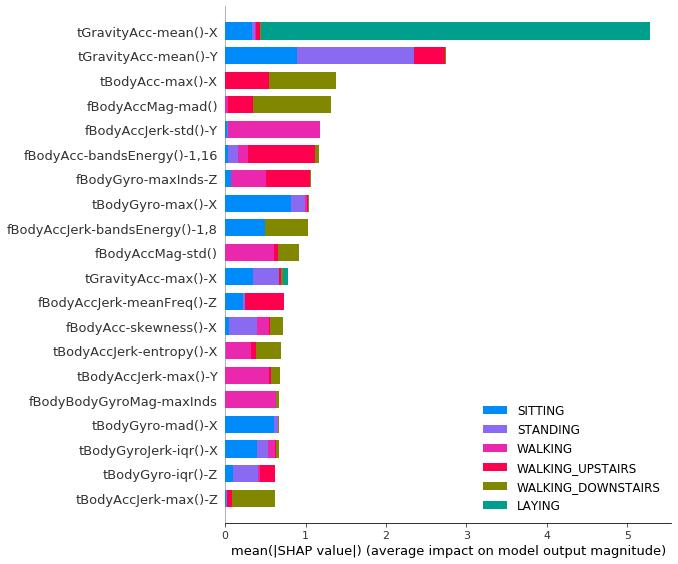

In [15]:
shap.summary_plot(shap_values, X_test, class_names=model.classes_)

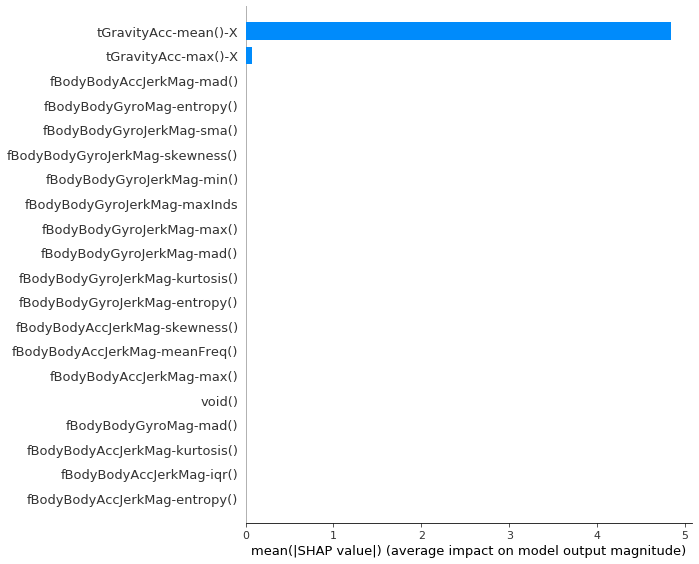

In [16]:
shap.summary_plot(shap_values[0], X_test, plot_type="bar")